In [ ]:
from lib.utils import load_eeg_label_pair,test_evaluation,cm_grid
from lib.env import *
from tqdm import tqdm
from lib.models import MLP
import torch
from torch.utils.data import TensorDataset,DataLoader
import matplotlib.pyplot as plt

In [ ]:
X,y = load_eeg_label_pair(id='A1-1')
dataloader = DataLoader(TensorDataset(X,y),batch_size=256)

In [ ]:
model = MLP().to(DEVICE)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
lossi = []

model.train()

for epoch in tqdm(range(5000)):
    loss_total = 0
    for (Xi,yi) in dataloader:
        Xi,yi = Xi.to(DEVICE),yi.to(DEVICE)
        logits = model(Xi)
        loss = criterion(logits,yi)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_total += loss.item()
    lossi.append(loss_total/len(dataloader))
    
print(torch.tensor(lossi[-len(dataloader):]).mean())

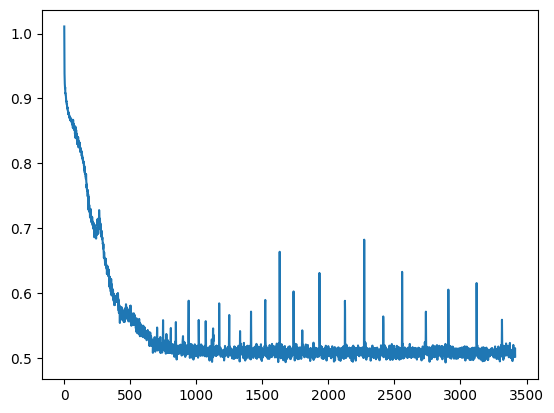

In [9]:
plt.plot(lossi)

In [10]:
with torch.no_grad():
    y_true = torch.Tensor()
    y_pred = torch.Tensor()
    loss_total = 0
    for (Xi,yi) in dataloader:
        y_true = torch.cat([y_true,yi.argmax(axis=1)])

        Xi,yi = Xi.to(DEVICE),yi.to(DEVICE)
        logits = model(Xi)
        loss = criterion(logits,yi)
        loss_total += loss.item()

        y_pred = torch.cat([y_pred,torch.softmax(logits,dim=1).argmax(axis=1).detach().cpu()])
        
loss_total/len(dataloader)

0.5010813597370597

In [11]:
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix
metrics = {
    'precision':precision_score(y_true=y_true,y_pred=y_pred,average='macro'),
    'recall':recall_score(y_true=y_true,y_pred=y_pred,average='macro'),
    'f1':f1_score(y_true=y_true,y_pred=y_pred,average='macro')
}
metrics

{'precision': 0.870696400625978,
 'recall': 0.6056801029041644,
 'f1': 0.6398379075117335}

In [12]:
import seaborn as sns

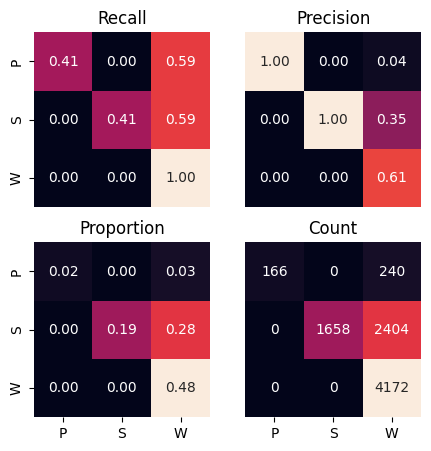

In [13]:
fig,axes = plt.subplots(2,2,figsize=(5,5))
sns.heatmap(confusion_matrix(y_true=y_true,y_pred=y_pred,normalize='true'),annot=True,fmt='.2f',cbar=False,ax=axes[0][0])
sns.heatmap(confusion_matrix(y_true=y_true,y_pred=y_pred,normalize='pred'),annot=True,fmt='.2f',cbar=False,ax=axes[0][1])
sns.heatmap(confusion_matrix(y_true=y_true,y_pred=y_pred,normalize='all'),annot=True,fmt='.2f',cbar=False,ax=axes[1][0])
sns.heatmap(confusion_matrix(y_true=y_true,y_pred=y_pred),annot=True,fmt='.0f',cbar=False,ax=axes[1][1])
axes[0][0].set_title('Recall')
axes[0][1].set_title('Precision')
axes[1][0].set_title('Proportion')
axes[1][1].set_title('Count')
axes[0][0].set_xticks([])
axes[0][1].set_xticks([])
axes[0][1].set_yticks([])
axes[1][1].set_yticks([])
axes[0][0].set_yticklabels(['P','S','W'])
axes[1][0].set_yticklabels(['P','S','W'])
axes[1][0].set_xticklabels(['P','S','W'])
axes[1][1].set_xticklabels(['P','S','W'])
plt.savefig(f'cm.jpg',dpi=200,bbox_inches='tight')

In [ ]:

    sns.heatmap(confusion_matrix(y_true=y_true,y_pred=y_pred,normalize='pred'),annot=True,ax=axes[1],cbar=False,fmt='.2f')
    sns.heatmap(confusion_matrix(y_true=y_true,y_pred=y_pred,normalize='all'),annot=True,ax=axes[2],cbar=False,fmt='.2f')
    sns.heatmap(confusion_matrix(y_true=y_true,y_pred=y_pred),annot=True,ax=axes[3],cbar=False,fmt='.2f')